**Pidilite Data Science Internship**  
**Problem Statement:** Predict whether a customer will purchase from the store, given data about customer’s information and past behaviour.  
**Work By:** Vishnu S Reddy  
**Email:** vishnusreddy007@gmail.com  
**Number:** 9742914197

In [31]:
# Importing the required packages
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv("data/train.csv")

## Data Cleaning

In [33]:
# Make all empty and blank spaces as NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

In [34]:
#Finding basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               150000 non-null  int64 
 1   STATE            148158 non-null  object
 2   AGE              150000 non-null  int64 
 3   OCCUPATION       107223 non-null  object
 4   INCOME_GROUP     146563 non-null  object
 5   CUSTOMER_SINCE   150000 non-null  int64 
 6   LOYALTY_PROGRAM  132176 non-null  object
 7   PAST_PURCHASE    150000 non-null  int64 
 8   PURCHASE         150000 non-null  object
dtypes: int64(4), object(5)
memory usage: 10.3+ MB


In [35]:

# Finding the number of null values in each of the columns
df.isnull().sum()

ID                     0
STATE               1842
AGE                    0
OCCUPATION         42777
INCOME_GROUP        3437
CUSTOMER_SINCE         0
LOYALTY_PROGRAM    17824
PAST_PURCHASE          0
PURCHASE               0
dtype: int64

We can see from the above output that all the missing values are from the columns containing categorical values i.e. STATE, OCCUPATION, INCOME_GROUP and LOYALTY_PROGRAM.  

Most people whold think it would be best to drop the column because it has over 1/3rd of the data empty. But that's not entirely true. When tested with various models, it was shown that using a new category as missing proved to be better for the accuracy and F1 score. 

In [36]:
#Filling with mode for the other columns and with a new category for occupation and loyalty program. 
df['STATE'].fillna(df['STATE'].mode()[0], inplace=True)
df['OCCUPATION'].fillna('U1', inplace=True)
df['INCOME_GROUP'].fillna(df['INCOME_GROUP'].mode()[0], inplace=True)
df['LOYALTY_PROGRAM'].fillna('U2', inplace=True)

In [37]:
df.isnull().sum()

ID                 0
STATE              0
AGE                0
OCCUPATION         0
INCOME_GROUP       0
CUSTOMER_SINCE     0
LOYALTY_PROGRAM    0
PAST_PURCHASE      0
PURCHASE           0
dtype: int64

Here, we have imputed the mode for STATE and INCOME_GROUP, but imputed new values for the OCCUPATION and the INCOME_GROUP.

In [52]:
# Taking a look at the data
df.head()

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,1,Uttar Pradesh,28,U1,Low,2018,No,4937,No
1,2,Madhya Pradesh,27,Salaried,Low,2018,No,10834,No
2,3,West Bengal,62,U1,High,2013,U2,8610,Yes
3,4,Tamil Nadu,27,Salaried,Low,2018,No,14374,Yes
4,5,Uttar Pradesh,40,Self employed,High,2015,No,13158,No


We don't need the ID column because it would make no sense to use it in a model. So let's drop it. 

In [38]:
df = df.drop('ID', axis = 1)

In [39]:
df.head()

,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,Uttar Pradesh,28,U1,Low,2018,No,4937,No
1,Madhya Pradesh,27,Salaried,Low,2018,No,10834,No
2,West Bengal,62,U1,High,2013,U2,8610,Yes
3,Tamil Nadu,27,Salaried,Low,2018,No,14374,Yes
4,Uttar Pradesh,40,Self employed,High,2015,No,13158,No


### Removing the Outliers

In [40]:
df.describe()

,AGE,CUSTOMER_SINCE,PAST_PURCHASE
count,150000.000000,150000.000000,150000.000000
mean,43.805660,2015.507960,11244.207287
std,14.828219,2.685645,8458.166886
min,23.000000,2008.000000,208.000000
25%,30.000000,2013.000000,6034.750000
50%,43.000000,2017.000000,8926.000000
75%,54.000000,2018.000000,13636.000000
max,85.000000,2019.000000,103520.000000


In [41]:
# Importing the library for this task
import seaborn as sns

<AxesSubplot:xlabel='PAST_PURCHASE'>

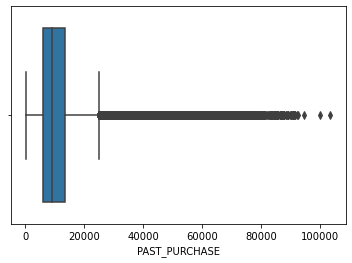

In [57]:
sns.boxplot(data=df,x=df['PAST_PURCHASE'])

We can see that this column has a lot of outliers. While the other numerical columns don't have them. Now let's remove the outliers from the dataset so that it makes sense to draw conclusions and build models on it. 

In [42]:
# Importing the library to perform this
from scipy import stats

# Removing the outliers based on the z score value meaning all data has to be less than 3 standard deviations. 
df = df[(np.abs(stats.zscore(df['PAST_PURCHASE'])) < 3)]

<AxesSubplot:xlabel='PAST_PURCHASE'>

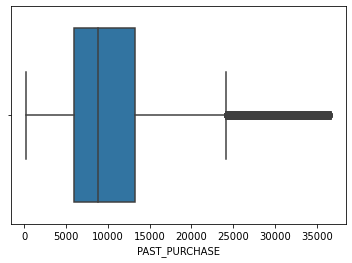

In [12]:
sns.boxplot(data=df,x=df['PAST_PURCHASE'])

We can now see that the data still has outliers, but it much more ideal to work on that before. 

In [13]:
df.describe()

,AGE,CUSTOMER_SINCE,PAST_PURCHASE
count,147016.000000,147016.000000,147016.000000
mean,43.722608,2015.527147,10470.208678
std,14.790993,2.675599,6292.265006
min,23.000000,2008.000000,208.000000
25%,30.000000,2013.000000,5982.000000
50%,43.000000,2017.000000,8790.000000
75%,54.000000,2018.000000,13227.250000
max,85.000000,2019.000000,36618.000000


Now that we are done cleaning the data, let's proceed to gather some insights from it. 

## Exploratory Data Analysis

In [14]:
# Importing the libraries needed to plot graphs on this data
import matplotlib.pyplot as plt
# We have already imported sns for the task above

#### Identifying which states we get most of our orders from. 

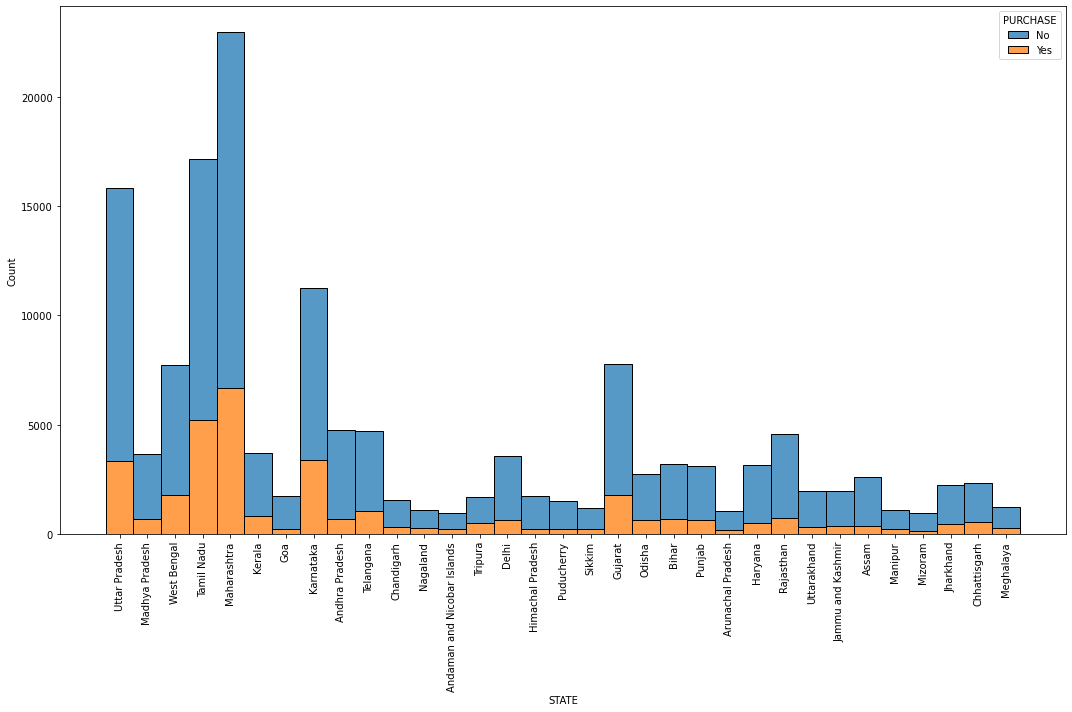

In [62]:
plt.figure(figsize=(15,10))
plot = sns.histplot(binwidth=0.5, x="STATE", hue="PURCHASE", data=df, stat="count", multiple="stack")
plt.setp(plot.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

As we can see in the above graph, most of the customers are from Maharashtra, Tamil Nadu, Uttar Pradesh and Karnataka. We can also see that Maharashtra has the highest number of customers who will purchase the product when approached by the store.

The cost of acquiring new customers is multi fold the cost of pitching a product to an existing customer. This means that it is best for the company to pitch to customers in Maharashtra, Tamil Nadu, Uttar Pradesh and Karnataka. 

#### Analyzing the Customer Income Group. 

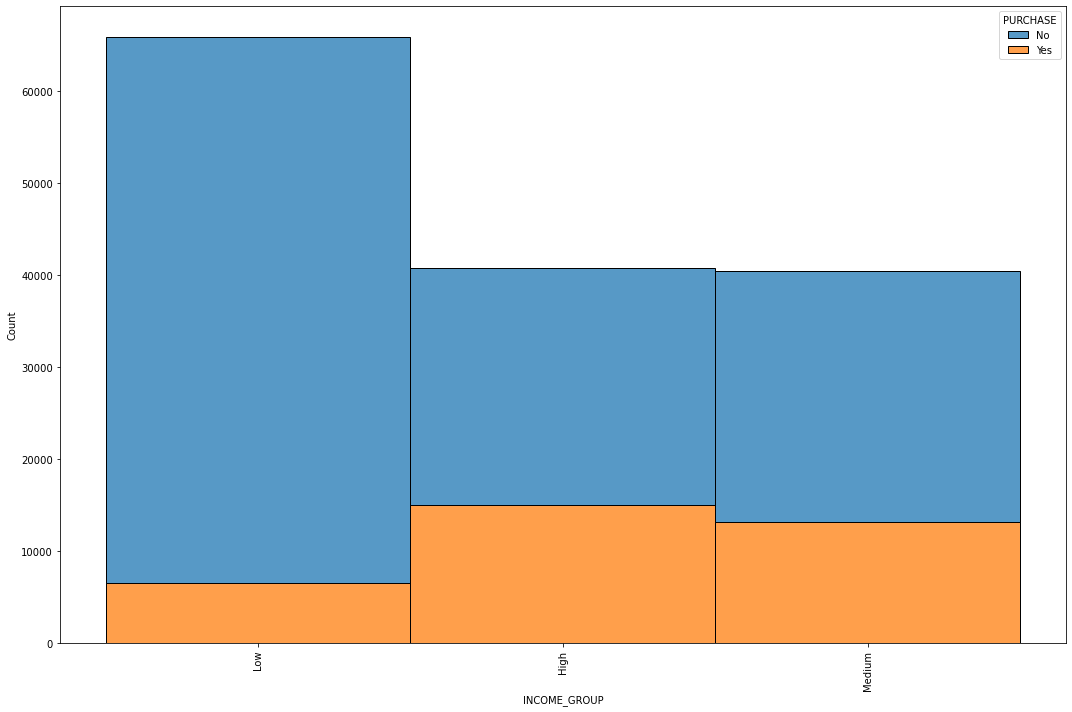

In [63]:
plt.figure(figsize=(15,10))
plot = sns.histplot(binwidth=0.5, x="INCOME_GROUP", hue="PURCHASE", data=df, stat="count", multiple="stack")
plt.setp(plot.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

We can see from the above plot that the customers from High income group are the ones who are more likely to buy than those from Medium and Low income group.

What this means is that it would make much more sense for us to pitch our products to people from high and medium income group than to those from low income group keeping the numer of pitches fixed. 

#### Checking how customers from different occupations react to the product pitch. 

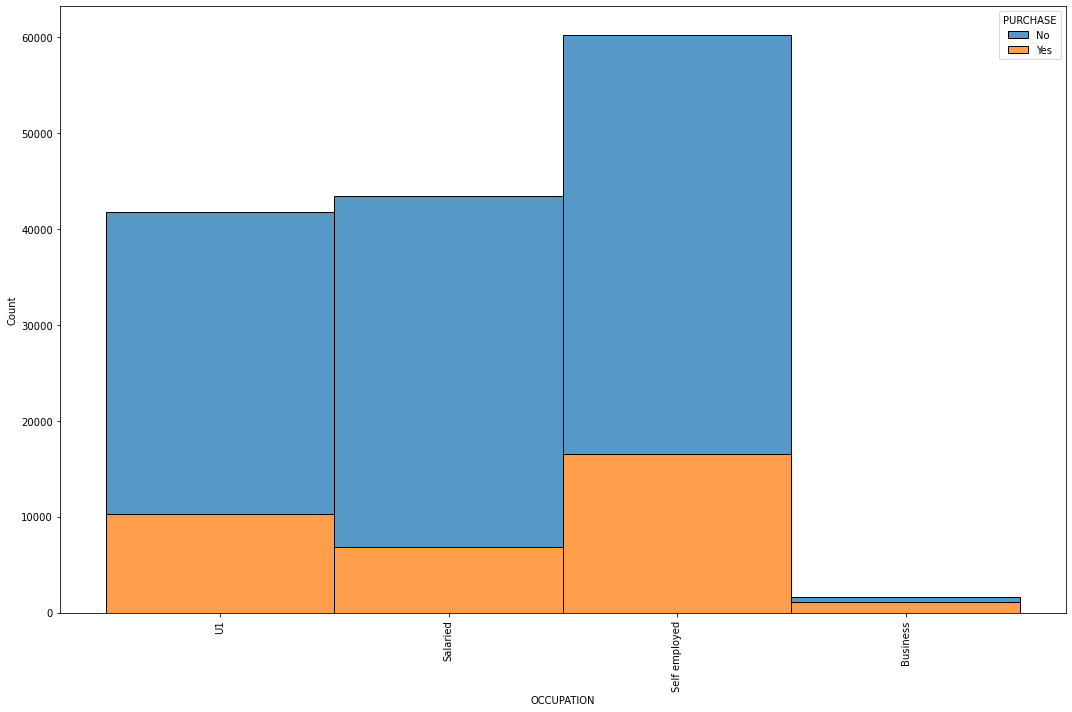

In [64]:
plt.figure(figsize=(15,10))
plot = sns.histplot(binwidth=0.5, x="OCCUPATION", hue="PURCHASE", data=df, stat="count", multiple="stack")
plt.setp(plot.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

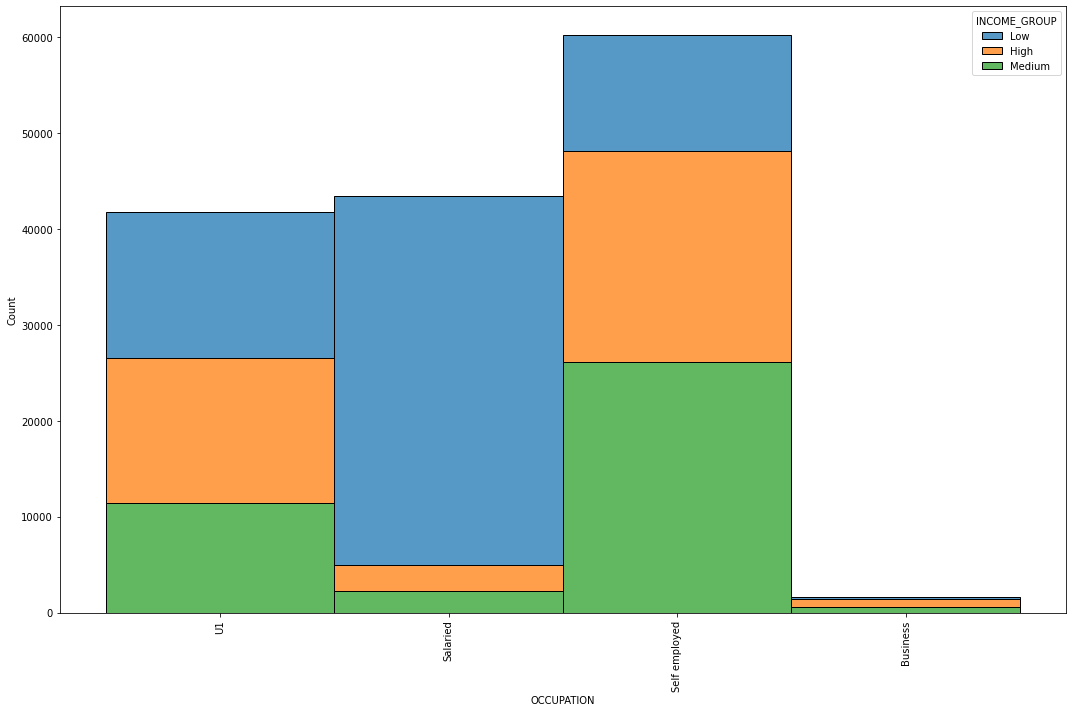

In [65]:
plt.figure(figsize=(15,10))
plot = sns.histplot(binwidth=0.5, x="OCCUPATION", hue="INCOME_GROUP", data=df, stat="count", multiple="stack")
plt.setp(plot.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

From the graphs shown above, it shows that people involved in business are more likely to buy our product even though they are of a much lesser number. We can see that people from the salaried class are majorly in the lower income group. But, we had seen in a earlier graph that people in the lower income group are not very likely to but the product.  

So what we understand from this is that we have to target people who are self employed, business men and women and those who have not mentioned their occupation because majority of them are not in the low income group.  

We could think those values are missing because the customers didn't like to disclose their professsion, or they were unemployed, they work in the inorganized sector, and so on. But it would not make sense to impute those cutomers into any other class because the distribution is very different. 

#### Checking if past purchase has an impact on buying a product.

<AxesSubplot:xlabel='PURCHASE', ylabel='PAST_PURCHASE'>

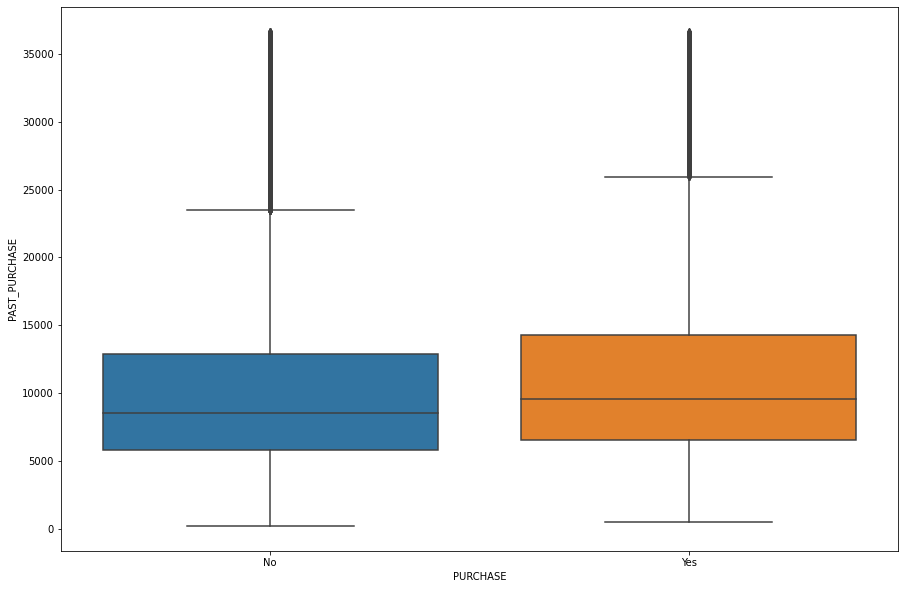

In [66]:
plt.figure(figsize=(15,10))

sns.boxplot(x='PURCHASE', y='PAST_PURCHASE', data=df)

We can see that customers who have spent more previously are more likely to say yes to a product the next time the store approaches them. So it would make sense for the store to aproach customers who have spent the highest first.

#### Checking if members of loyalty program are likely to buy again. 

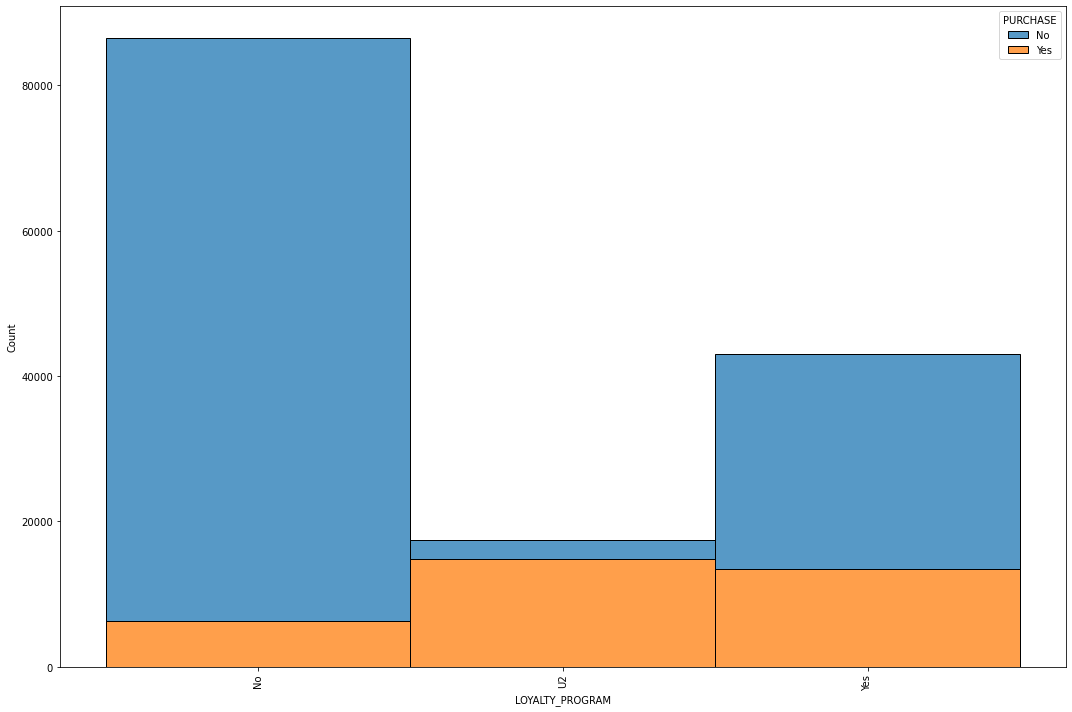

In [67]:
plt.figure(figsize=(15,10))
plot = sns.histplot(binwidth=0.5, x="LOYALTY_PROGRAM", hue="PURCHASE", data=df, stat="count", multiple="stack")
plt.setp(plot.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

Here, I have considered that customers who have a missing entry in the list are not members of the loyaty program because the distribution between them and the other groups are very different. While practivally it is either yes or no, the prediction model would perform better when we introduce another class. 

Though, when we look at the graph above, it looks like those members are part of the loyalty program. 

#### Checking if the year of first purchase impacts the purchase. 

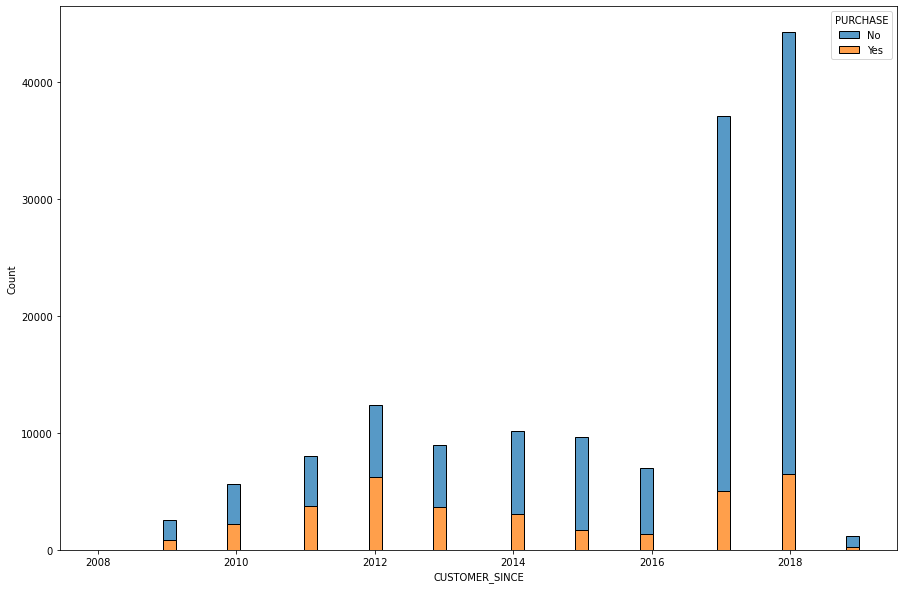

In [68]:
plt.figure(figsize=(15,10))
plot = sns.histplot( x="CUSTOMER_SINCE", hue="PURCHASE", data=df, stat="count", multiple="stack")


From the above graph, we can see that the company has had an exponential rise from the year 2017. This could either because we don't have all the proir data or that the company has actually grown that way. 

While the number of customers has increased and the number of customers who would purchase when approached by the company has increased, the percentage has been constantly low. This means that the company has to improve the way that they would market their approach towards the customer.

Based on all the above graphs, we can see that all these features are an importnat part to help the company make decisions whether the customer will buy the product or not. 

## Predictive Model Building

In [43]:

# Importing all the requisite classifiers
from xgboost import XGBClassifier
from catboost import CatBoostClassifier as CBC
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import Perceptron as PPT
from sklearn.tree import DecisionTreeClassifier as DTF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as NB

# Importing the metrics 
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
# Checking the data once again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147016 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   STATE            147016 non-null  object
 1   AGE              147016 non-null  int64 
 2   OCCUPATION       147016 non-null  object
 3   INCOME_GROUP     147016 non-null  object
 4   CUSTOMER_SINCE   147016 non-null  int64 
 5   LOYALTY_PROGRAM  147016 non-null  object
 6   PAST_PURCHASE    147016 non-null  int64 
 7   PURCHASE         147016 non-null  object
dtypes: int64(3), object(5)
memory usage: 10.1+ MB


We can see that we have handled all the NaN values, removed the outliers and removed the ID column because they have have no real significance to this decision. 

In [44]:
# We will encode the PURCHASE column as 0 or 1. 
df['PURCHASE'] = df['PURCHASE'].map({'Yes': 1, 'No': 0})

In [72]:
# This function encodes all the categorical columns, which are hashable and comparable, with a value between 0 and n_classes-1
def FeatureEncoding(X_train,X_test):
    # The include parameter of describe is used to select features of a particular dtype. Here, categorical features are chosen
    categorical=X_train.describe(include='O').columns
    for feature in categorical:
        print('Encoding feature:',feature)
        le = preprocessing.LabelEncoder()
        # The dataset has already been split into training and testing datasets and they are both encoded. Encoding is done
        # separately so that there is no bias in the testing dataset that has passed on over from the training dataset.
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])
    return (X_train,X_test)

In [73]:
# This function scales and standardises all the features to a distribution with zero mean and unit standard deviation.
# In other words, features are standardized by removing their mean and scaling them to unit variance.
# z=(x-u)/s
def StandardScaling(X_train,X_test):
    scaler = StandardScaler()
    # Centering and scaling happen independently on each feature, and the relevant statistics are stored in the internal state
    # of the scaler for future use. They are called upon by using the transform feature
    
    # fit_transform computes the mean and standard deviation of the dataset, and then transform the features of the same dataset
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
    # The testing dataset is scaled according to the same statistics as those of the training dataset. This is because we want
    # the positions of the unlabelled test samples relative to our train dataset
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
    return (X_train, X_test)

In [74]:
def fit_and_predict(model,X_train,y_train,X_test,y_test):
    # For each model,
    #Fit the model to the training dataset
    model.fit(X_train,y_train)
    #Once fitted, apply the model to the test dataset and draw up predictions
    Y_prediction=model.predict(X_test)
    # Record the probability estimates of the classes(this is a binary class problem). Visually, it is the probability that
    # prediction lies on either side of the hyperplane
    Y_probs=model.predict_proba(X_test)
    #Discard the probability of class 0 since one leads to another by subtraction from 1
    Y_probs = Y_probs[:, 1]
    
        #Plot ROC and compute AUC score
    fpr,tpr,_=roc_curve(y_test,Y_probs)
    auc=roc_auc_score(y_test,Y_probs)
    
    ftpr.append((fpr,tpr,auc))
        #Record training and testing accuracies
    train_accuracy.append(model.score(X_train,y_train))
    test_accuracy.append(accuracy_score(y_test,Y_prediction))
    fscore.append(f1_score(y_test, Y_prediction))

In [75]:
def Classification(X_train,y_train,X_test,y_test):
    models=[]
    models.append(RFC(n_estimators=100))
    models.append(LR(max_iter=10000))
    models.append(KNN(n_neighbors=3))
    models.append(NB())
    models.append(SVC(kernel="linear",probability=True))
    models.append(DTF())
    models.append(CBC(learning_rate=0.04))
    models.append(XGBClassifier())
    models.append(LGBMClassifier())
    #Fit the dataset for each of these classifiers: Random Forest, Logistic Regression, K-Nearest Neighbors, Kernelized Support 
    #Vector Machines, Decision Tree Classifier and CatBoost
    for i,model in enumerate(models):
        fit_and_predict(model,X_train,y_train,X_test,y_test)
        print(model,"done!")
        print("Training Accuracy:",train_accuracy[i])
        print("Test Accuracy:",test_accuracy[i])
        print("F1 Score:", fscore[i])

In [76]:
# Represent the training and testing accuracies in the form of an easy-to-interpret table
def represent(train_accuracy,test_accuracy, f1_score):
    results = pd.DataFrame({
        'Model': ['Random Forest','Logistic Regression','KNN(3)','Naive Bayes','Support Vector Machine', 'Decision Tree', 'Catboost','XGBoost','LGBM'],
        'Training Score': train_accuracy,
        'Testing Score': test_accuracy,
        'F1 Score': fscore})
    result_df = results.set_index('Model')
    print(result_df)

In [77]:
# Plot the Receiver Operating Characteristics for each of the classifiers with respect to the base classifier with no 
# disciminative/predictive power(TPR=FPR line)
def plotROC(ftpr):
    ns_probs = [0 for _ in range(len(y_test))]
    ns_fpr,ns_tpr,_=roc_curve(y_test,ns_probs)
    plt.figure(figsize=(10,10))
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    labels=['Random Forest','Logistic Regression','KNN(n=3)','Naive Bayes','Support Vector Classifier','Decision Tree','Catboost','XGBoost','LGBM']
    labels=iter(labels)
    for i in ftpr:
        plt.plot(i[0],i[1],marker='.', label='%s, %lf'%(next(labels),i[2]))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [45]:
#Split the dataset into 70(train) - 30(test)
X = df.drop(['PURCHASE'], axis=1)
y = df['PURCHASE']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [80]:
train_accuracy=[]
test_accuracy=[]
ftpr=[]
fscore=[]

X_train,X_test=FeatureEncoding(X_train,X_test)
X_train,X_test=StandardScaling(X_train,X_test)
Classification(X_train,y_train,X_test,y_test)

Encoding feature: STATE
Encoding feature: OCCUPATION
Encoding feature: INCOME_GROUP
Encoding feature: LOYALTY_PROGRAM


<ipython-input-72-9c22418f3d0b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[feature] = le.fit_transform(X_train[feature])
<ipython-input-72-9c22418f3d0b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[feature] = le.transform(X_test[feature])


RandomForestClassifier() done!
Training Accuracy: 0.9997473545102078
Test Accuracy: 0.8411744700147376
F1 Score: 0.6230019912814165
LogisticRegression(max_iter=10000) done!
Training Accuracy: 0.7647967661377306
Test Accuracy: 0.7634055095794128
F1 Score: 0.30437970801946534
KNeighborsClassifier(n_neighbors=3) done!
Training Accuracy: 0.8941901254482029
Test Accuracy: 0.8291350187053622
F1 Score: 0.6037021455616323
GaussianNB() done!
Training Accuracy: 0.7572271185781889
Test Accuracy: 0.7556739598684956
F1 Score: 0.4678518518518518
SVC(kernel='linear', probability=True) done!
Training Accuracy: 0.7628533392931757
Test Accuracy: 0.766874504024487
F1 Score: 0.0
DecisionTreeClassifier() done!
Training Accuracy: 0.9998153744497673
Test Accuracy: 0.7802063258133999
F1 Score: 0.5352828379674017
0:	learn: 0.6606120	total: 171ms	remaining: 2m 50s
1:	learn: 0.6304517	total: 191ms	remaining: 1m 35s
2:	learn: 0.6032383	total: 212ms	remaining: 1m 10s
3:	learn: 0.5793902	total: 234ms	remaining: 58.

C:\Users\vishn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:21:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) done!
Training Accuracy: 0.8702568238575079
Test Accuracy: 0.8575671692551865
F1 Score: 0.6359949009155174


In [81]:
represent(train_accuracy,test_accuracy,fscore)

                        Training Score  Testing Score  F1 Score
Model                                                          
Random Forest                 0.999747       0.841174  0.623002
Logistic Regression           0.764797       0.763406  0.304380
KNN(3)                        0.894190       0.829135  0.603702
Naive Bayes                   0.757227       0.755674  0.467852
Support Vector Machine        0.762853       0.766875  0.000000
Decision Tree                 0.999815       0.780206  0.535283
Catboost                      0.865155       0.859041  0.634917
XGBoost                       0.870257       0.857567  0.635995
LGBM                          0.863435       0.859834  0.633116


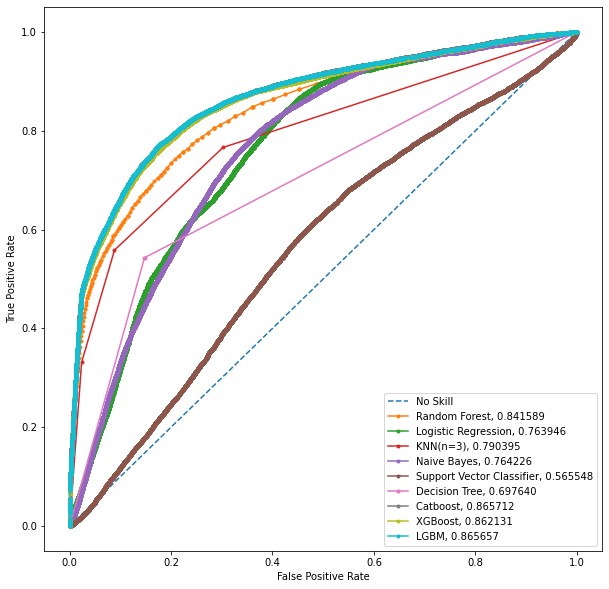

In [82]:
plotROC(ftpr)

From the above graph and data, we can see that the standard version of XGBoost provides us with the highest F1 score which according to the question is the evaluation metric, so we will be using that to predict the values in test.csv.

## Now loading the test dataframe for prediction

In [47]:
testdf = pd.read_csv("data/test.csv")

In [48]:
submission = pd.read_csv("data/sample_submission.csv")

In [49]:
testdf = testdf.replace(r'^\s*$', np.nan, regex=True)

In [50]:
#Filling with mode for the other columns similar to the method we did during training
testdf['STATE'].fillna(testdf['STATE'].mode()[0], inplace=True)
testdf['OCCUPATION'].fillna('U1', inplace=True)
testdf['INCOME_GROUP'].fillna(testdf['INCOME_GROUP'].mode()[0], inplace=True)
testdf['LOYALTY_PROGRAM'].fillna('U2', inplace=True)

In [51]:
testdf = testdf.drop('ID', axis=1)

In [52]:
testdf.head()

,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE
0,Maharashtra,50,Self employed,Medium,2018,No,12746
1,Maharashtra,58,Self employed,High,2011,Yes,12277
2,Andaman and Nicobar Islands,30,Salaried,Low,2017,Yes,16401
3,Mizoram,27,Salaried,Low,2018,Yes,9665
4,Uttar Pradesh,67,U1,Medium,2014,No,15724


In [53]:
testdf.describe(include='O').columns

Index(['STATE', 'OCCUPATION', 'INCOME_GROUP', 'LOYALTY_PROGRAM'], dtype='object')

In [54]:
categorical=X_train.describe(include='O').columns
for feature in categorical:
        print('Encoding feature:',feature)
        le = preprocessing.LabelEncoder()
        # The dataset has already been split into training and testing datasets and they are both encoded. Encoding is done
        # separately so that there is no bias in the testing dataset that has passed on over from the training dataset.
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])
        testdf[feature] = le.transform(testdf[feature])

Encoding feature: STATE
Encoding feature: OCCUPATION
Encoding feature: INCOME_GROUP
Encoding feature: LOYALTY_PROGRAM


<ipython-input-54-2e1b340dfbe0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[feature] = le.fit_transform(X_train[feature])
<ipython-input-54-2e1b340dfbe0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[feature] = le.transform(X_test[feature])


In [56]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
test_df_scaled = pd.DataFrame(scaler.transform(testdf), columns = X.columns)

In [57]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: ",f1_score(y_test, predictions))

C:\Users\vishn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:55:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 85.76%
F1 Score:  0.6359949009155174


In [58]:
# Predicting the values for the given test dataset
pred = model.predict(test_df_scaled)
predictions = [round(value) for value in pred]

In [59]:
len(predictions)

50000

In [60]:
submission["PURCHASE"] = predictions

In [61]:
submission

,ID,PURCHASE
0,150001,0
1,150002,0
2,150003,0
3,150004,0
4,150005,0
...,...,...
49995,199996,0
49996,199997,1
49997,199998,0
49998,199999,0


In [62]:
submission['PURCHASE'] = submission['PURCHASE'].map({1: 'Yes', 0: 'No'})

In [63]:
submission

,ID,PURCHASE
0,150001,No
1,150002,No
2,150003,No
3,150004,No
4,150005,No
...,...,...
49995,199996,No
49996,199997,Yes
49997,199998,No
49998,199999,No


In [64]:
submission.to_csv('submission.csv',index=False)

With this, the submission dataset has been populated.